<a href="https://colab.research.google.com/github/Wilson30678tw/Week3-ClassicML/blob/my_branch/Week3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')

In [ ]:
emotions_dict ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [ ]:
features=pd.read_csv('/content/drive/MyDrive/featuresRavdess.csv',index_col=0)
emotions=pd.read_csv('/content/drive/MyDrive/emotionsRavdess.csv',index_col=0)

In [ ]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.700774,0.682254,0.721813,0.712694,0.721013,0.751301,0.762274,0.767467,0.775089,0.753828,...,-0.844825,-1.449385,-1.636801,-1.169948,-0.407185,0.526490,0.444928,-0.545303,-0.899794,-1.065791
1,0.685525,0.688144,0.690283,0.755877,0.820215,0.821966,0.801405,0.782814,0.742456,0.718314,...,-1.831094,-1.542663,-0.201960,-0.480004,0.557405,0.270044,-1.388379,0.114239,-0.770378,-0.304880
2,0.645078,0.669609,0.699656,0.684427,0.701292,0.757168,0.760762,0.719712,0.724569,0.740335,...,-1.366737,-3.429536,-2.701701,-2.545479,-2.373800,-1.142667,-0.932497,-2.504158,-4.573128,-2.491820
3,0.664684,0.660828,0.696505,0.744623,0.801000,0.824164,0.787425,0.783138,0.775928,0.725456,...,-2.316690,-1.730209,-0.796525,-0.391329,-0.872846,0.062842,-1.452371,-0.215853,-1.106407,-1.023314
4,0.700437,0.703657,0.719508,0.763426,0.823376,0.833634,0.799772,0.779867,0.765078,0.752307,...,-2.286849,-1.202225,-1.524055,-1.448435,-0.274042,-0.299847,-1.461973,-1.328029,-1.884212,-2.034279


In [ ]:
# We would usually use df.describe(), but it provides a bit of a mess of information we don't need at the moment.
features_df = pd.DataFrame(features) # make it pretty for display

#making dataframe for emotions as well
emotions_df = pd.DataFrame(emotions) # make it pretty for display

print(features_df.shape)
print(emotions_df.shape)

(1440, 180)
(1440, 1)


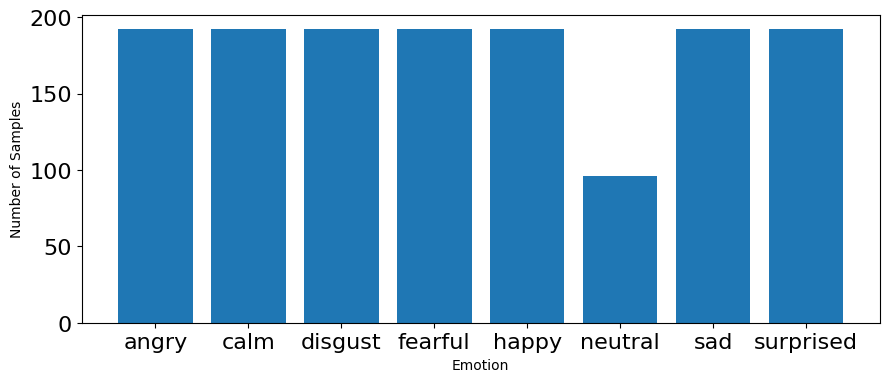

12 Chromagram features:           min = 0.000,     max = 0.874,     mean = 0.664,     deviation = 0.095

128 Mel Spectrogram features:     min = 0.000,     max = 149.208,     mean = 0.188,     deviation = 1.603

40 MFCC features:                 min = -873.242,    max = 115.126,    mean = -14.971,    deviation = 99.547


In [ ]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x=range(8), height=count)
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()




def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.iloc[:,:12]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}')

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.iloc[:,12:140]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.iloc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')

print_features(features_df)

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features
features_minmax = scaler.fit_transform(features_minmax)

print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)


from sklearn.model_selection import train_test_split


############# Unscaled test/train set #############
X_train, X_test, y_train, y_test =train_test_split(
    features,
    emotions,
    test_size=0.2,
    random_state=42
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    features_scaled,
    emotions,
    test_size=0.2,
    random_state=42
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    features_scaled,
    emotions,
    test_size=0.2,
    random_state=42
)


Standard Scaling:

12 Chromagram features:           min = -7.756,     max = 2.268,     mean = 0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.474,     max = 36.543,     mean = -0.000,     deviation = 1.000

40 MFCC features:                 min = -4.306,    max = 6.240,    mean = 0.000,    deviation = 1.000


MinMax Scaling:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.783,     deviation = 0.111

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.014,     deviation = 0.060

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.405,    deviation = 0.167


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)


,Classifier,Accuracy Score
0,KNeighborsClassifier,59.03%
4,RandomForestClassifier,56.94%
1,SVC,54.51%
2,SVC RBF kernel,49.65%
3,DecisionTreeClassifier,37.85%
5,AdaBoostClassifier,29.51%
6,GaussianNB,26.04%
7,QuadraticDiscriminantAnalysis,19.44%


In [ ]:
from sklearn.svm import SVC

model = SVC(
    C=10,  #higher the value tighter the margin
    gamma='auto',
    kernel='rbf',
    random_state=42
)

model.fit(X_train, y_train)

print(f'SVC Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'SVC Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

from sklearn.neighbors import KNeighborsClassifier

####### Default kNN  ########
model = KNeighborsClassifier(
)

model.fit(X_train, y_train)

print(f'Default kNN Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default kNN Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')

##### (hastily) tuned kNN ######
model = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'distance',
    algorithm = 'brute',
    n_jobs=4
)

model.fit(X_train, y_train)

print(f'kNN Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'kNN Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

from sklearn.ensemble import RandomForestClassifier

####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500,
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = True, # more on this below
    random_state=42
)

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

SVC Model's accuracy on training set is 99.74%
SVC Model's accuracy on test set is 50.35%
Default kNN Model's accuracy on training set is 68.06%
Default kNN Model's accuracy on test set is 44.10%

kNN Model's accuracy on training set is 99.74%
kNN Model's accuracy on test set is 48.96%
Default Random Forest Model's accuracy on training set is 99.74%
Default Random Forest Model's accuracy on test set is 55.90%

Random Forest Model's accuracy on training set is 99.74%
Random Forest Model's accuracy on test set is 57.99%


**Compare with My audio**

In [ ]:
features=pd.read_csv('/content/drive/MyDrive/my_audio_featuresRavdess.csv',index_col=0)
emotions=pd.read_csv('/content/drive/MyDrive/my_audio_emotionsRavdess.csv',index_col=0)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.607362,0.583233,0.579904,0.538367,0.480250,0.480554,0.461294,0.467565,0.555205,0.601437,...,1.444871,3.661883,4.542642,3.893767,6.261982,3.339123,3.645392,2.968026,2.770515,-0.710785
1,0.648284,0.684741,0.722489,0.690534,0.746325,0.776540,0.710614,0.682694,0.710451,0.731994,...,0.697636,-2.273654,-1.048142,-3.062778,-2.246513,-2.622515,-2.921465,0.710850,-0.101671,-0.872929
2,0.680636,0.678979,0.667645,0.686727,0.742261,0.746659,0.744396,0.709447,0.719472,0.714002,...,-0.088898,-0.257014,-1.703997,-0.652201,-1.711466,-2.075417,-1.905586,-0.431647,-0.891223,-2.378582
3,0.629311,0.661443,0.616044,0.623214,0.666405,0.679667,0.664542,0.635375,0.627684,0.635279,...,-1.953951,-2.450751,0.271979,-0.878340,-2.648299,-3.039664,-4.198112,-2.845568,-1.806264,-3.954085
4,0.707378,0.670713,0.679541,0.712391,0.730415,0.671845,0.624776,0.630974,0.682147,0.733755,...,-2.379040,0.446219,-0.631720,-1.777545,0.594460,-1.330767,-2.680642,-0.482762,-0.446259,-3.640624


In [ ]:
# We would usually use df.describe(), but it provides a bit of a mess of information we don't need at the moment.
features_df = pd.DataFrame(features) # make it pretty for display

#making dataframe for emotions as well
emotions_df = pd.DataFrame(emotions) # make it pretty for display

print(features_df.shape)
print(emotions_df.shape)

(8, 180)
(8, 1)


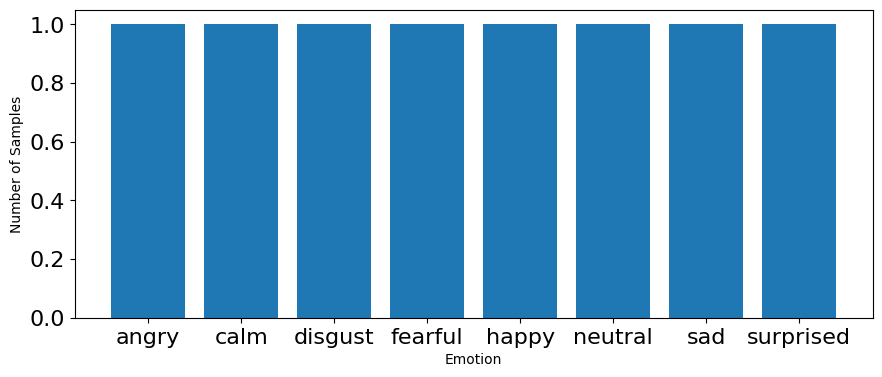

12 Chromagram features:           min = 0.461,     max = 0.777,     mean = 0.661,     deviation = 0.065

128 Mel Spectrogram features:     min = 0.001,     max = 85.337,     mean = 2.606,     deviation = 6.642

40 MFCC features:                 min = -369.303,    max = 148.436,    mean = -5.763,    deviation = 56.117


In [ ]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x=range(8), height=count)
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()




def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.iloc[:,:11]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}')

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.iloc[:,12:139]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.iloc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')

print_features(features_df)



In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features
features_minmax = scaler.fit_transform(features_minmax)

print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)


from sklearn.model_selection import train_test_split


############# Unscaled test/train set #############
X_train, X_test, y_train, y_test =train_test_split(
    features,
    emotions,
    test_size=0.2,
    random_state=42
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    features_scaled,
    emotions,
    test_size=0.2,
    random_state=42
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    features_scaled,
    emotions,
    test_size=0.2,
    random_state=42
)


Standard Scaling:

12 Chromagram features:           min = -2.291,     max = 1.584,     mean = 0.000,     deviation = 1.006

128 Mel Spectrogram features:     min = -1.904,     max = 2.624,     mean = 0.000,     deviation = 1.000

40 MFCC features:                 min = -2.491,    max = 2.427,    mean = -0.000,    deviation = 1.002


MinMax Scaling:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.602,     deviation = 0.323

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.349,     deviation = 0.339

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.476,    deviation = 0.340


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)


ValueError: y has only 1 sample in class angry, covariance is ill defined.

In [ ]:
from sklearn.svm import SVC

model = SVC(
    C=10,  #higher the value tighter the margin
    gamma='auto',
    kernel='rbf',
    random_state=42
)

model.fit(X_train, y_train)

print(f'SVC Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'SVC Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

SVC Model's accuracy on training set is 100.00%
SVC Model's accuracy on test set is 0.00%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

####### Default kNN  ########
model = KNeighborsClassifier(
)

model.fit(X_train, y_train)

print(f'Default kNN Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default kNN Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')

##### (hastily) tuned kNN ######
model = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'distance',
    algorithm = 'brute',
    n_jobs=4
)

model.fit(X_train, y_train)

print(f'kNN Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'kNN Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default kNN Model's accuracy on training set is 16.67%
Default kNN Model's accuracy on test set is 0.00%

kNN Model's accuracy on training set is 100.00%
kNN Model's accuracy on test set is 0.00%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500,
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = True, # more on this below
    random_state=42
)

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default Random Forest Model's accuracy on training set is 100.00%
Default Random Forest Model's accuracy on test set is 0.00%

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 0.00%
